# Discrete Dynamical systems

In [89]:
import numpy as np
from pylds import base
import matplotlib.pyplot as plt

## Standard map

The Standard map also called the "Chirikov standard map" follows the equations

\begin{array}{lcr}
\bar{p}  =  p+K\sin (x) \\
\bar{x}  =  x+\bar{p}  
\end{array}

The dynamics produced by the above map is periodic due to $sin(x)$, so trajectories can be considered to happen in 1) a cylindrical domain, or 2) in a toroidal domain, which lead to redefining the above equations as

* _Cylindrical domain_

\begin{array}{lcr}
\bar{p}  =  p+K\sin (x) \\
\bar{x}  =  x+\bar{p} \quad mod 2\pi
\end{array}

with $(x, p) \in [0, 2 \pi]/\mathbb{Z} \times [0, 2\pi]$


* _Toroidal domain_

\begin{array}{lcr}
\bar{p}  =  p+K\sin (x) \quad mod 2 \pi\\
\bar{x}  =  x+\bar{p}  \quad mod 2 \pi
\end{array}

with $(x, p) \in [0, 2 \pi]/\mathbb{Z} \times [0, 2\pi]/\mathbb{Z}$

The above are the standard definitions are recurently used to introduce the Stdandard map.

SOURCE
https://mathworld.wolfram.com/StandardMap.html


However, _James Meiss_ introduced an equivalent definition but with a rescaled domain to a unit square centred at the origin, hence leading to the defintion below


* _Toroidal domain_

\begin{array}{lcr}
    \bar{x} = x + y - \frac{K}{2 \pi} sin(2 \pi x) \quad mod1\\
    \bar{y} = y - \frac{K}{ 2 \pi} sin(2 \pi x) \quad mod1
\end{array}

with $(x, p) \in [-1/2, 1/2]/\mathbb{Z} \times [1/2, 1/2]/\mathbb{Z}$

where $x \quad mod 1$ is defined as

\begin{equation*}
x \quad mod 1 = x - [x - 1/2]
\end{equation*}

SOURCE https://www.researchgate.net/publication/225134005_Visual_Explorations_of_Dynamics_the_Standard_Map

In [153]:
def StandardMap(u_initial, PARAMETERS=[0.3]):
    """
    Returns 1D Hamilton-Centre vector field at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [omega]
    Functional form: v = (omega*y, - omega*x), with u = (x, y)
    
    Parameters
    ----------
    u : array_like, shape(n,)
        points in phase space to determine vector field at time t
    
    PARAMETERS : list of floats
        vector field parameters
    
    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    x_initial, y_initial = u_initial.T
    # Hamiltonian Model Parameter
    K, = PARAMETERS
    
    # Map components 
    x_next = x_initial + y_initial - (K/(2*np.pi))*np.sin(2*np.pi*x_initial)
    y_next = y_initial - (K/(2*np.pi))*np.sin(2*np.pi*x_initial)
    
    # Map next iteration
    u_next = np.array([ x_next, y_next]).T

    return u_next

**NOTE** Defnition taken from Page 802 of _Meiss, J. D. (1992), “Symplectic Maps, Variational Principles, and Transport,” Rev. Mod. Phys. 64: 795-848._



TEST: Plot trajectories using different implementations

[0.30492152 0.29858164]


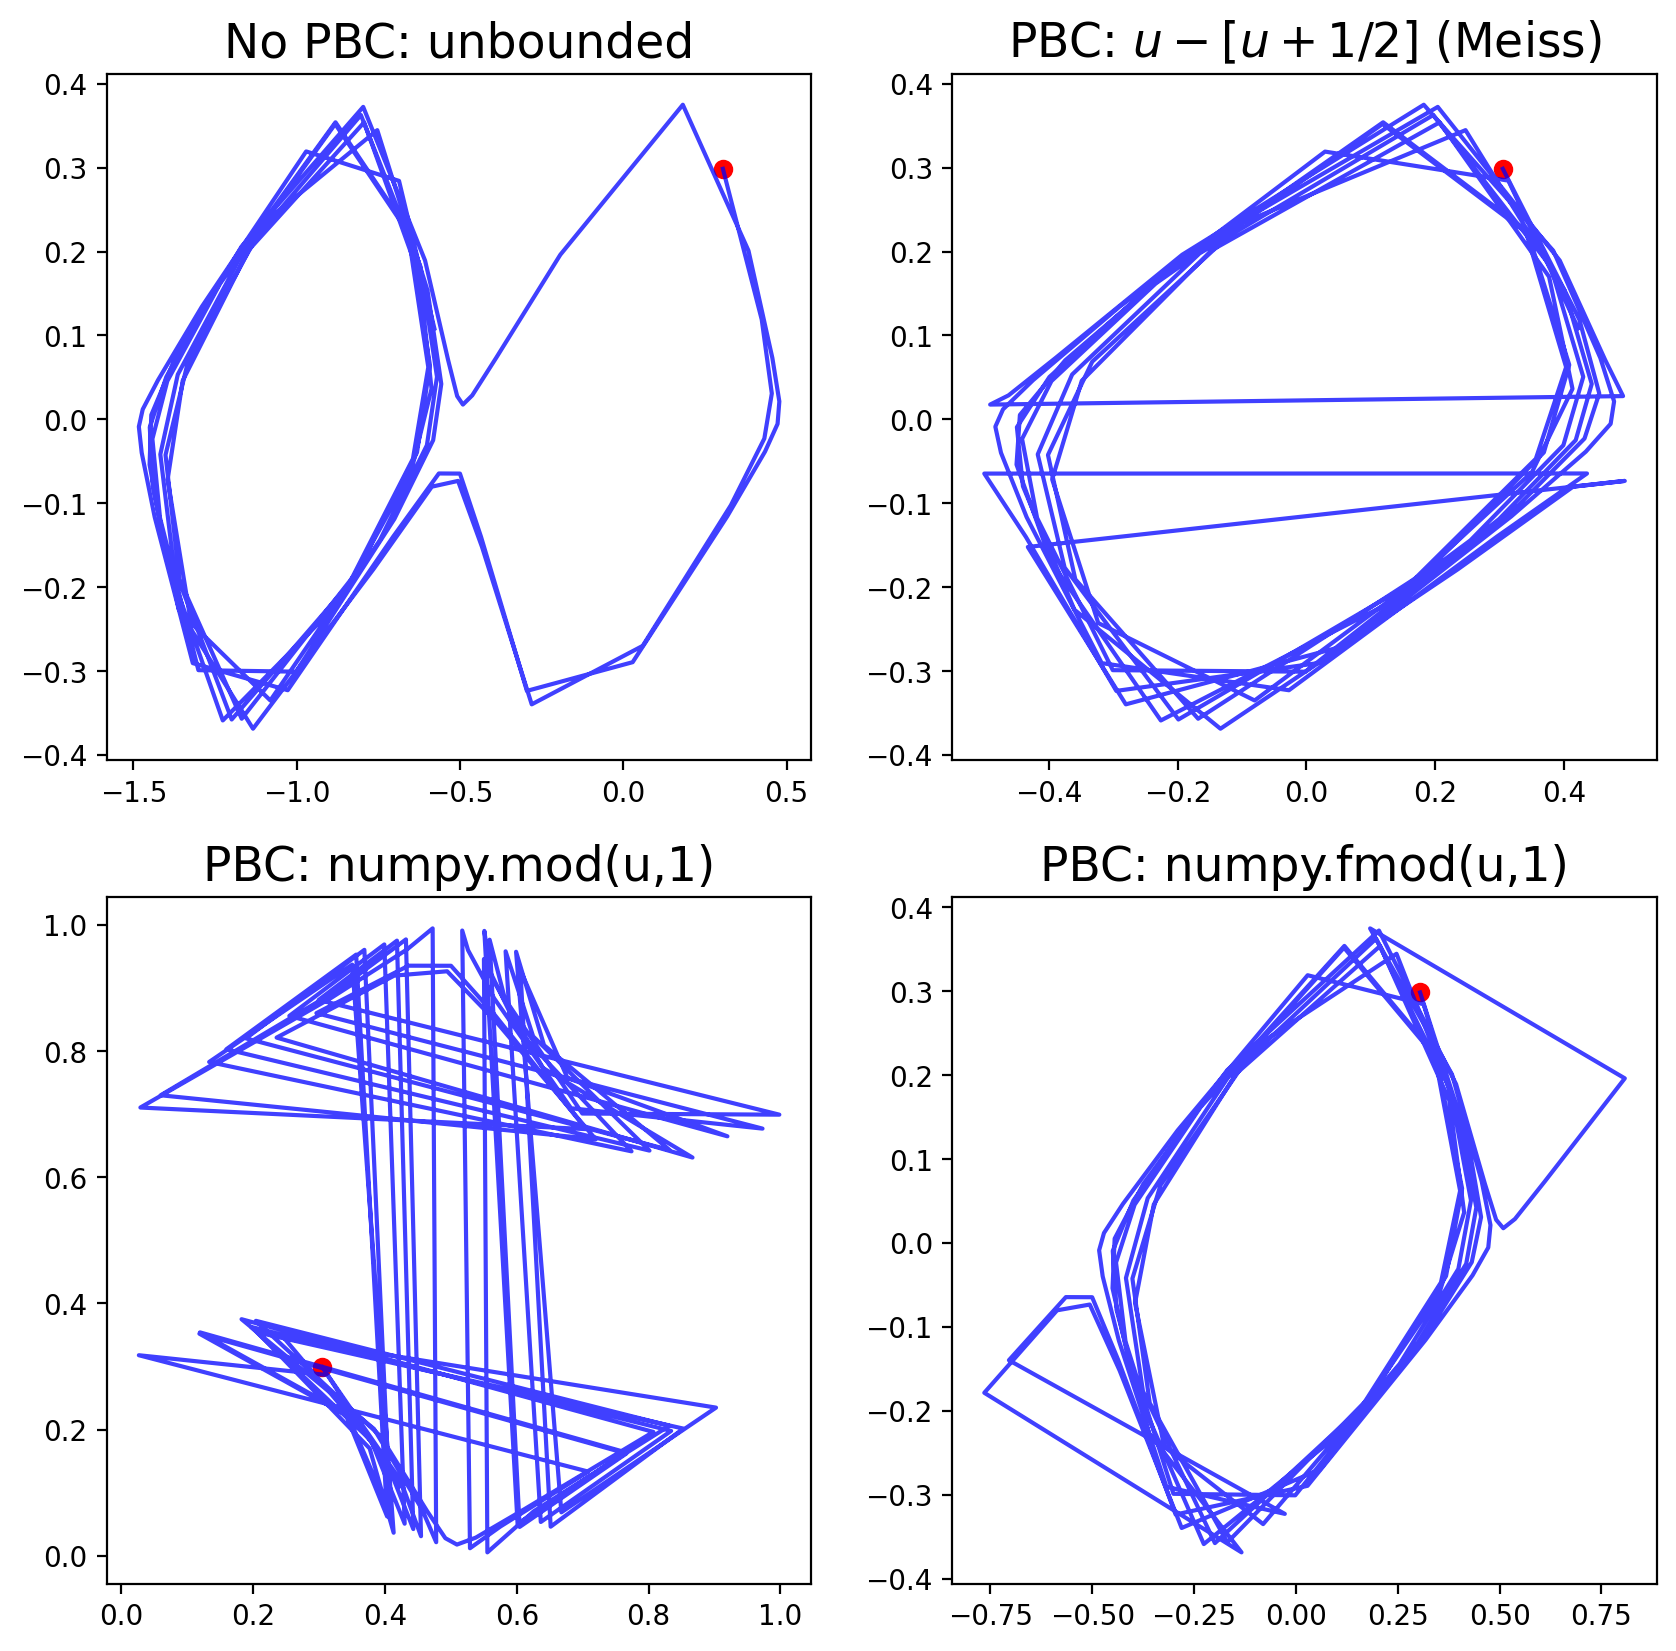

In [152]:
u0 = np.random.rand(2) - 0.5

K = 1.2
trajectory_wrapped1 = [u0]
trajectory_wrapped2 = [u0]
trajectory_wrapped3 = [u0]
trajectory_unwrapped = [u0]


N_iterations = 100

u_initial = u0
for n in range(N_iterations):
    u_next = StandardMap(u_initial, PARAMETERS=[K])
    u_initial = u_next
    trajectory_unwrapped.append(u_initial)

u_initial = u0
for n in range(N_iterations):
    u_next = StandardMap(u_initial, PARAMETERS=[K])
    u_initial = u_next - np.floor(u_next + 1/2)
    trajectory_wrapped1.append(u_initial)
    
u_initial = u0
for n in range(N_iterations):
    u_next = StandardMap(u_initial, PARAMETERS=[K])
    u_initial = np.remainder(u_next,1)
    trajectory_wrapped2.append(u_initial)

u_initial = u0
for n in range(N_iterations):
    u_next = StandardMap(u_initial, PARAMETERS=[K])
    u_initial = np.fmod(u_next, 1)
    trajectory_wrapped3.append(u_initial)

    
trajectory_unwrapped = np.array(trajectory_unwrapped)
trajectory_wrapped1 = np.array(trajectory_wrapped1)
trajectory_wrapped2 = np.array(trajectory_wrapped2)
trajectory_wrapped3 = np.array(trajectory_wrapped3)
print(u0)

##################################
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10),dpi=200)

ax1.plot(*trajectory_unwrapped.T, 'b',alpha=0.75)
ax1.scatter(*u0,c='red')
ax1.set_title("No PBC: unbounded", fontsize=17)

ax2.plot(*trajectory_wrapped1.T, 'b',alpha=0.75)
ax2.scatter(*u0,c='red')
ax2.set_title("PBC: $u - [u + 1/2]$ (Meiss)", fontsize=17)

ax3.plot(*trajectory_wrapped2.T, 'b',alpha=0.75)
ax3.scatter(*u0,c='red')
ax3.set_title("PBC: numpy.mod(u,1)", fontsize=17)

ax4.plot(*trajectory_wrapped3.T, 'b',alpha=0.75)
ax4.scatter(*u0,c='red')
ax4.set_title("PBC: numpy.fmod(u,1)", fontsize=17)

plt.show()

* `numpy.mod(x, a)`  implements

\begin{equation}
sgn(a) * ( x \% a )
\end{equation}


* `numpy.fmod(x, a)` implements

\begin{equation}
    mod(x, a) = x - a*int(x/a)
\end{equation}

**NOTES**

Difference in implementation across programming languages

https://en.wikipedia.org/wiki/Modulo_operation

NumPy definition of `np.mod` function

https://numpy.org/doc/stable/reference/generated/numpy.mod.html

In [2]:
import numpy

In [119]:
x = -5.86
L = 1
print(x - int(numpy.floor(x/L))*L, x - int(numpy.floor_divide(x, L))*L, numpy.remainder(x, L), numpy.mod(x,L), x%L, numpy.fmod(x,L))

0.13999999999999968 0.13999999999999968 0.13999999999999968 0.13999999999999968 0.13999999999999968 -0.8600000000000003


In [118]:
x = 4.369389474
L = 1
print(x - int(numpy.floor(x/L))*L, numpy.remainder(x, L), numpy.mod(x,L), numpy.fmod(x,L))

0.3693894740000001 0.3693894740000001 0.3693894740000001 0.3693894740000001


In [53]:
def StandardMap_inverse(u_initial, PARAMETERS=[0.3]):
    """
    Returns 1D Hamilton-Centre vector field at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [omega]
    Functional form: v = (omega*y, - omega*x), with u = (x, y)
    
    Parameters
    ----------
    u : array_like, shape(n,)
        points in phase space to determine vector field at time t
    
    PARAMETERS : list of floats
        vector field parameters
    
    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    x_initial, y_initial = u_initial.T
    # Hamiltonian Model Parameter
    K, = PARAMETERS
    
    # Map components 
    x_next = x_initial - y_initial
    y_next = y_initial + (K/(2*np.pi))*np.sin(2*np.pi*(x_initial - y_initial))
    
    # Map next iteration
    u_next = np.array([ x_next, y_next]).T

    return u_next

In [4]:
grid_parameters = [[-0.5, 0.5, 20],[-0.5, 0.5, 20]]

In [5]:
points_original, mask = base.generate_points(grid_parameters)
points_original = points_original.reshape(-1,3)
points_original = points_original[:,:-1]

N_iterations = 200
f = StandardMap

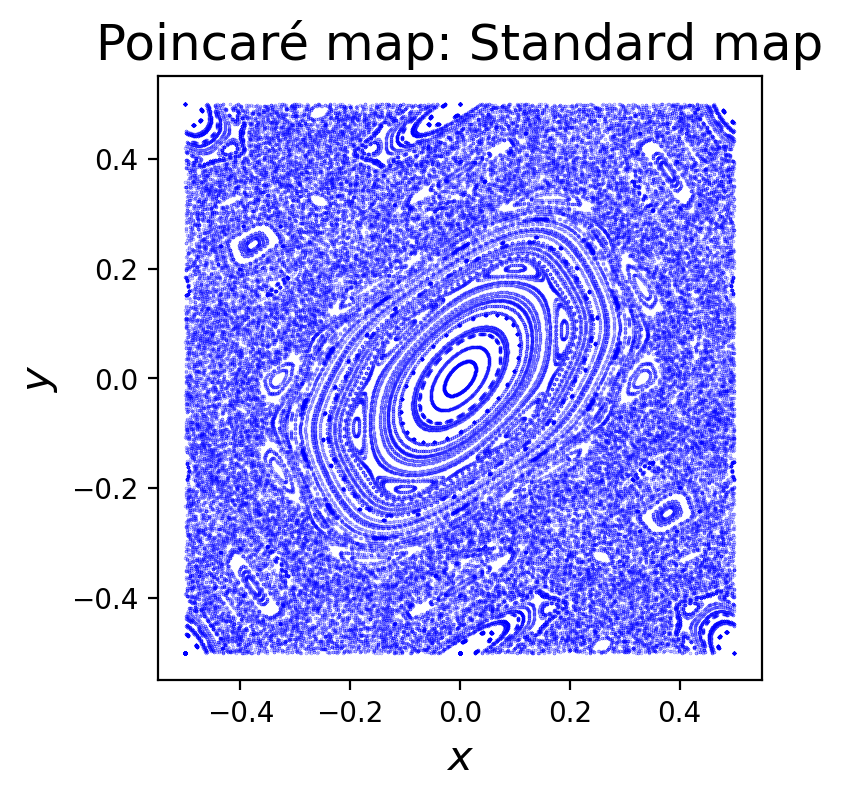

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=200)

for k in range(len(points_original)):
    points_initial = points_original[k]
    trajectory = []
    for i in range(N_iterations):
        points_next = f(points_initial, PARAMETERS=[1.2])
        points_next = points_next - np.floor(points_next + 1/2)

        trajectory.append(points_next)
        
        points_initial = points_next
        
    plt.scatter(*np.array(trajectory).T,c='blue',s=0.05,alpha=0.5)

plt.gca().set_aspect('equal', adjustable='box')
plt.title("Poincaré map: Standard map", fontsize=18)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.show()

GRAPHIC OUTPUT, Modified Standard map


In [43]:
def StandardMap_modified(u_initial, PARAMETERS=[0.3]):
    """
    Returns 1D Hamilton-Centre vector field at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [omega]
    Functional form: v = (omega*y, - omega*x), with u = (x, y)
    
    Parameters
    ----------
    u : array_like, shape(n,)
        points in phase space to determine vector field at time t
    
    PARAMETERS : list of floats
        vector field parameters
    
    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    x_initial, y_initial = u_initial.T
    # Hamiltonian Model Parameter
    K, = PARAMETERS
    
    # Map components 
    x_next = x_initial + y_initial - (K/(2*np.pi))*np.sin(2*np.pi*x_initial)
    y_next = y_initial - (K/(2*np.pi))*np.sin(2*np.pi*x_initial)
    
    # Map next iteration
    u_next = np.array([ x_next, y_next]).T
    u_next = np.mod(u_next, 1)

    return u_next

In [84]:
grid_parameters = [[0, 1, 20],[0, 1, 20]]

points_original, mask = base.generate_points(grid_parameters)
points_original = points_original.reshape(-1,3)
points_original = points_original[:,:-1]

N_iterations = 200

In [85]:
f = StandardMap_modified

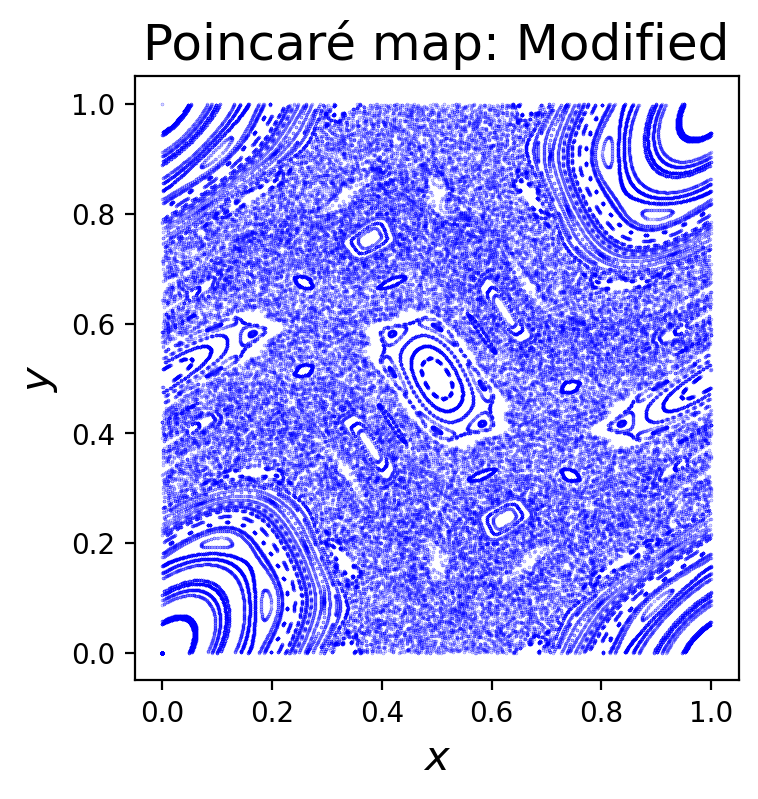

In [86]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=200)
TRAJECTORIES = []
for k in range(len(points_original)):
    points_initial = points_original[k]
    trajectory = []
    for i in range(N_iterations):
        points_next = f(points_initial, PARAMETERS=[1.2])
#         points_next = points_next - np.floor(points_next + 1/2)

        trajectory.append(points_next)
        
        points_initial = points_next
        
    plt.scatter(*np.array(trajectory).T,c='blue',s=0.05,alpha=0.5)
    TRAJECTORIES.append(trajectory)

plt.gca().set_aspect('equal', adjustable='box')
plt.title("Poincaré map: Modified", fontsize=18)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.show()

# Implementation 

In [7]:
import numpy as np
from operator import itemgetter
from functools import lru_cache
from pylds.tools import draw_lagrangian_descriptor
from pylds.base import generate_points, lagrangian_descriptor

In [8]:
def compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value=0.5, box_boundaries=False):
    y0, mask = generate_points(grid_parameters)
    y0 = y0.reshape(-1,3)
    y0 = y0[:,:-1]
    
    f = discrete_map
    
    LD_values = np.zeros(len(y0))
    for i in range(N_iterations):
        LD_values = LD_values + lagrangian_descriptor(y0, f(y0)-y0, p_value)        
        y0 = f(y0)

    N_points_slice_axes = [x[-1] for x in grid_parameters]
    LD = np.abs(LD_values).reshape(*N_points_slice_axes) #reshape to 2-D array     
    
    if p_value<=1:
        return LD
    else:
        return LD**(1/p_value)

Input parameters

In [9]:
p_value = 0.5

N_iterations = 10

x_min, x_max, Nx = [-0.5, 0.5, 1200]
y_min, y_max, Ny = [-0.5, 0.5, 1200]

K = 1.2 # standard map parameter

In [10]:
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

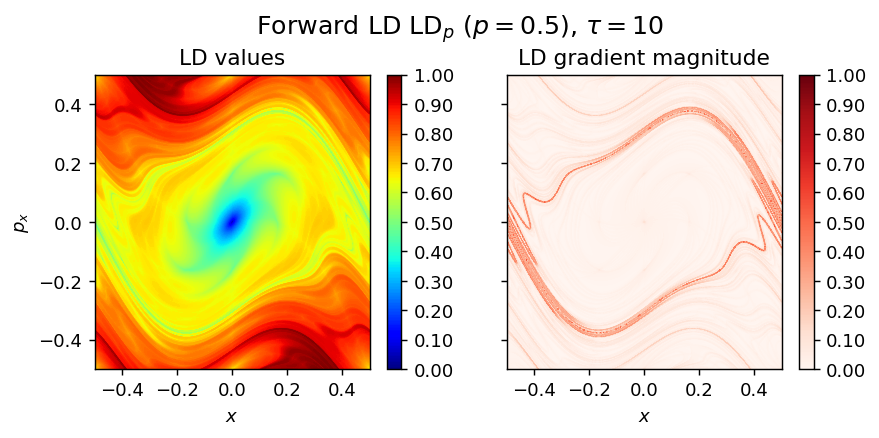

In [11]:
discrete_map = lambda u: StandardMap(u,PARAMETERS=[K])

LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value)
draw_lagrangian_descriptor(LD_forward, 'forward', grid_parameters, N_iterations, p_value, colormap_name='jet')

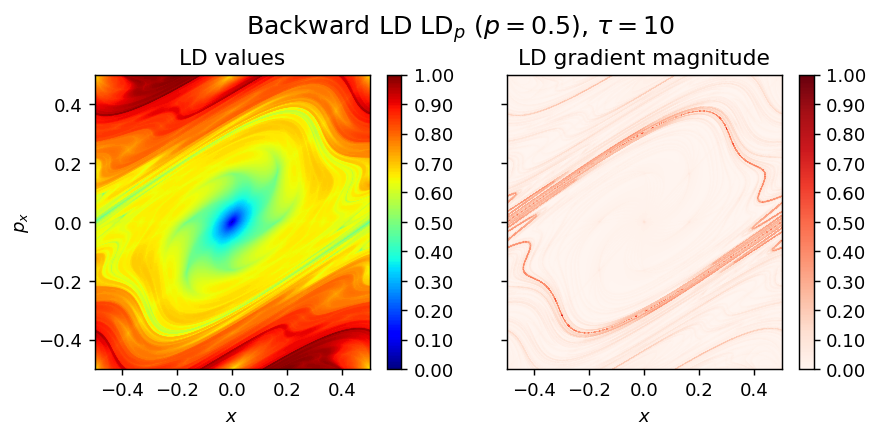

In [12]:
discrete_map = lambda u: StandardMap_inverse(u,PARAMETERS=[K])

LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value)
draw_lagrangian_descriptor(LD_backward, 'backward', grid_parameters, N_iterations, p_value, colormap_name='jet')

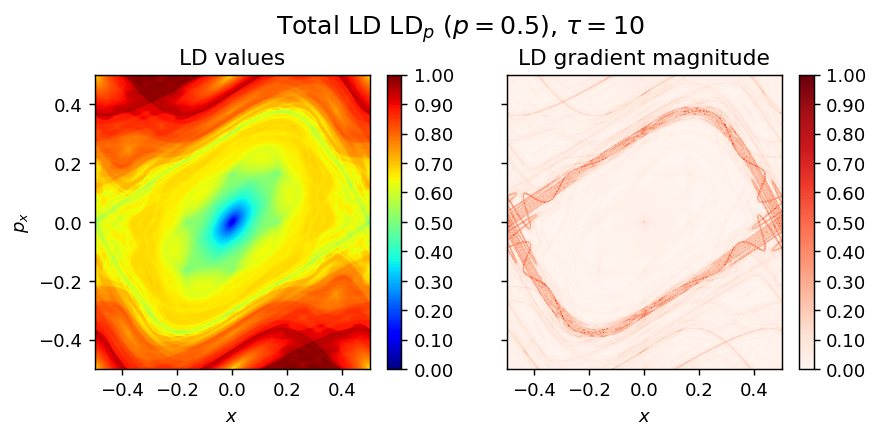

In [13]:
LD_total = LD_forward + LD_backward
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, N_iterations, p_value, colormap_name='jet')

## Hénon map

REFERENCES

* https://mathworld.wolfram.com/HenonMap.html
* https://en.wikipedia.org/wiki/H%C3%A9non_map

In [14]:
def check_if_points_escape_box(u, box_boundaries):
    x, y = u.T
    # Escape condition
    box_x_min, box_x_max = box_boundaries[0]
    box_y_min, box_y_max = box_boundaries[1]
    u_indices = (x >= box_x_min) & (x <= box_x_max) & (y >= box_y_min) & (y <= box_y_max)
    return u_indices

In [16]:
import numpy as np

def HenonMap(u_initial, PARAMETERS=[0.298, 1]):
    """
    Returns 1D Hamilton-Centre vector field at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [omega]
    Functional form: v = (omega*y, - omega*x), with u = (x, y)
    
    Parameters
    ----------
    u : array_like, shape(n,)
        points in phase space to determine vector field at time t
    
    PARAMETERS : list of floats
        vector field parameters
    
    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    x_initial, y_initial = u_initial.T
    # Hamiltonian Model Parameter
    a, b = PARAMETERS
    
    # Map components
    x_next = a - x_initial**2 + b*y_initial
    y_next = x_initial
    
    # Map next iteration
    u_next = np.array([ x_next, y_next]).T
    
    return u_next

In [17]:
def HenonMap_inverse(u_initial, PARAMETERS=[0.298, 1]):
    """
    Returns 1D Hamilton-Centre vector field at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [omega]
    Functional form: v = (omega*y, - omega*x), with u = (x, y)
    
    Parameters
    ----------
    u : array_like, shape(n,)
        points in phase space to determine vector field at time t
    
    PARAMETERS : list of floats
        vector field parameters
    
    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    x_initial, y_initial = u_initial.T
    # Hamiltonian Model Parameter
    a, b = PARAMETERS
    
    # Map components
    x_next = y_initial
    y_next = (x_initial - a + y_initial**2)/b
    
    # Map next iteration
    u_next = np.array([ x_next, y_next]).T
    
    return u_next

In [18]:
p_value = 0.5

N_iterations = 12

x_min, x_max, Nx = [-1.5, 1.5, 600]
y_min, y_max, Ny = [-1.5, 1.5, 600]

a, b = [0.298, 1] # standard map parameter

box_boundaries = [(-5, 5),(-5, 5)]

In [19]:
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

In [20]:
discrete_map = HenonMap

In [21]:
def compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value=0.5, box_boundaries=False):
    N_dim = len(grid_parameters)
    
    if box_boundaries == False:
        box_boundaries = int(N_dim)*[[-np.infty, np.infty]] 

    N_mesh_axes = len(box_boundaries)+1
    y0, mask = generate_points(grid_parameters)
    y0 = y0.reshape(-1,N_mesh_axes)
    y0 = y0[:,:-1]
        
    f = discrete_map

    LD_values = np.zeros(len(y0))
    for i in range(N_iterations):
        y = f(y0)
        y_inbox = check_if_points_escape_box(y, box_boundaries)

        y[y_inbox == True]  = f(y0[y_inbox])
        y[y_inbox == False] = y0[y_inbox == False]

        LD_values = LD_values + lagrangian_descriptor(y0, y-y0, p_value)        
        y0 = y

    N_points_slice_axes = [x[-1] for x in grid_parameters]
    LD = LD_values.reshape(*N_points_slice_axes) #reshape to 2-D array  

    if p_value<=1:
        return LD
    else:
        return LD**(1/p_value)

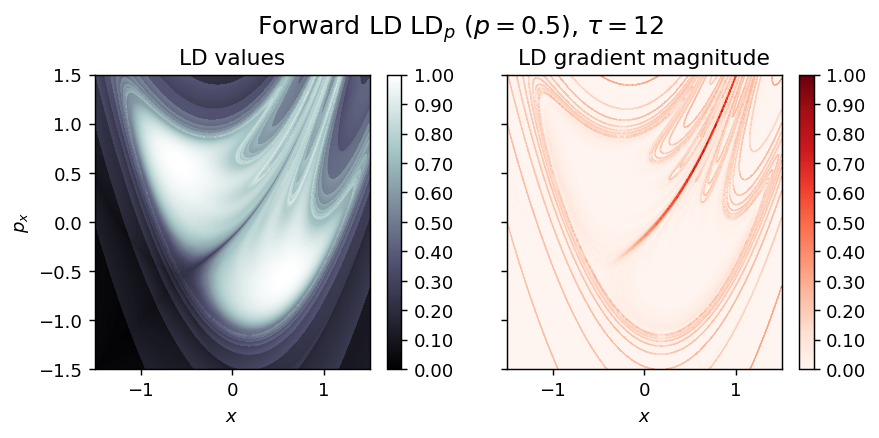

In [22]:
discrete_map = lambda u: HenonMap(u,PARAMETERS=[a, b])

LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value, box_boundaries)
draw_lagrangian_descriptor(LD_forward,'forward', grid_parameters, N_iterations, p_value, colormap_name='bone')

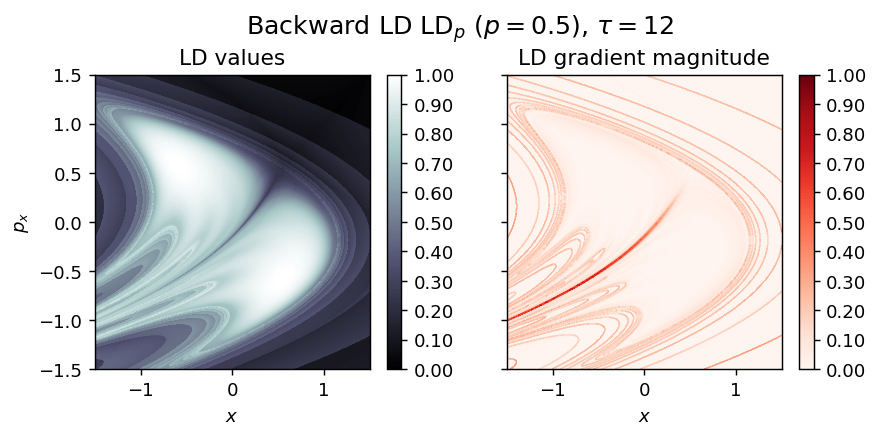

In [23]:
discrete_map = lambda u: HenonMap_inverse(u,PARAMETERS=[a, b])

LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value, box_boundaries)
draw_lagrangian_descriptor(LD_backward,'backward', grid_parameters, N_iterations, p_value, colormap_name='bone')

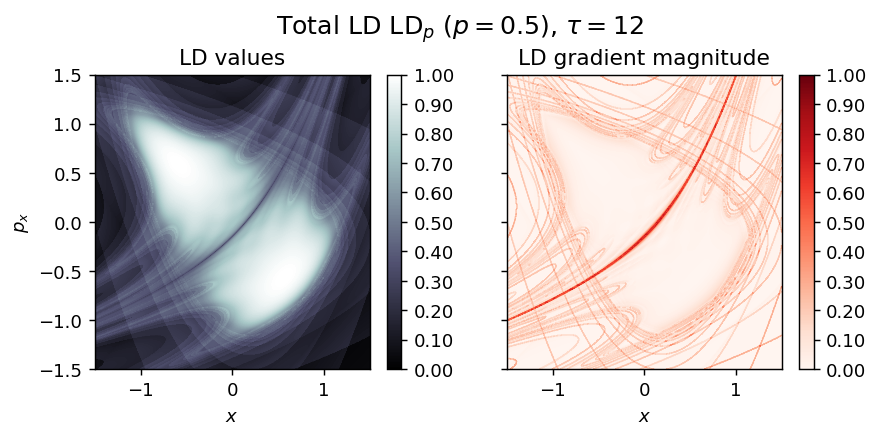

In [24]:
LD_total = LD_forward + LD_backward
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, N_iterations, p_value, colormap_name='bone')

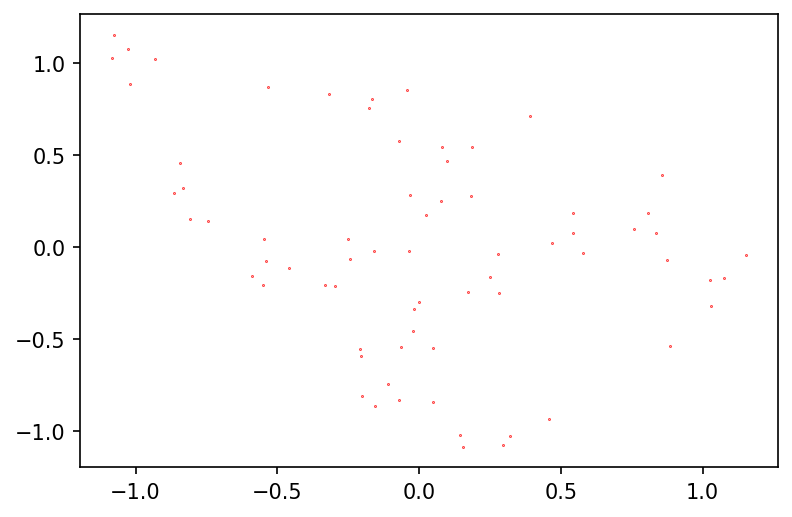

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=150)

points_initial = np.array([0,0])

trajectory = []
for i in range(70):
    points_next = discrete_map(points_initial)
    trajectory.append(points_next)
    points_initial = points_next

plt.scatter(*np.array(trajectory).T,c='red',s=0.1)

plt.show()

# Modules

## `base_discrete.py`

In [34]:
%%writefile pylds/base_discrete.py
import numpy as np
from operator import itemgetter
from pylds.base import generate_points, lagrangian_descriptor

def check_if_points_escape_box(u, box_boundaries):
    """
    Determine if points in 2D plane, u, have escaped box with user-defined dimensions.
    
    Parameters
    ----------
    u : array_like, shape(n, )
        points in plane to check if outside box boundaries
    
    box_boundaries : list of 2-tuples of floats
        box lower and upper limits along X and Y axes
        
    Returns
    -------
    u_indices : array_like, shape(n, )
        array of True/False bool values if points inside/outside the box
    """
    x, y = u.T
    # Escape condition
    box_x_min, box_x_max = box_boundaries[0]
    box_y_min, box_y_max = box_boundaries[1]
    u_indices = (x >= box_x_min) & (x <= box_x_max) & (y >= box_y_min) & (y <= box_y_max)
    return u_indices

def compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value=0.5, box_boundaries=False):
    """
    Returns the values of the LD function from trajectories from iterated initial conditions in plane by a map.
    
    Parameters
    ----------
    grid_parameters : list of 3-tuples of floats
        input parameters of limits and size of mesh per axis.
    
    discrete_map: function
        map of discrete 2D dynamical system.
        
    tau : float
        Upper limit of integration.
        
    p_value : float, optional
        Exponent in Lagrangian descriptor definition.
        0 is the acton-based LD,
        0 < p_value < 1 is the Lp quasinorm,
        1 <= p_value < 2 is the Lp norm LD,
        2 is the arclength LD.
        The default is 0.5.
    
    box_boundaries : list of 2-tuples, optional
        Box boundaries for escape condition of variable time integration.
        Boundaries are infinite by default.
    
    Returns
    -------
    LD : ndarray, shape (Nx, Ny)
        Array of computed Lagrangian descriptor values for all initial conditions.
    """
    N_mesh_axes = len(grid_parameters)+1
    y0, mask = generate_points(grid_parameters)
    y0 = y0.reshape(-1,N_mesh_axes)
    y0 = y0[:,:-1] # exclude LD-axis
        
    f = discrete_map

    LD_values = np.zeros(len(y0))
    for i in range(N_iterations):
        y = f(y0)
        if box_boundaries:
            y_inbox = check_if_points_escape_box(y, box_boundaries)
            y[y_inbox == False] = y0[y_inbox == False]

        LD_values = LD_values + lagrangian_descriptor(y0, y-y0, p_value)        
        y0 = y

    N_points_slice_axes = [x[-1] for x in grid_parameters] #take number of points
    LD = LD_values.reshape(*N_points_slice_axes) #reshape to 2-D array  

    if p_value<=1:
        return LD
    else:
        return LD**(1/p_value)

Overwriting pylds/base_discrete.py


## `discrete_maps.py`

In [36]:
%%writefile pylds/discrete_maps.py

import numpy as np

def StandardMap(u_initial, PARAMETERS=[0.3]):
    """
    2D Standard map for initial conditions in a unit square, centred at the origin (James Meiss).
    The map will return unwrapped trajectories for iterations of initial conditions, unlike when using PBCs.
    For computation of the Lagrangian Descriptor relative displacements are only needed. 
    
    Number of model parameters: 1 . PARAMETERS = [K]
    Functional form: 
    x_next  = x_initial + y_initial - (K/(2*np.pi))*np.sin(2*np.pi*x_initial
    y_next  = y_initial - (K/(2*np.pi))*np.sin(2*np.pi*x_initial))
    
    where u_initial = (x_initial, y_initial) 
    
    Parameters
    ----------
    u_initial : array_like, shape(n,)
        initial points in unit square to determine their next iteration under the map
    
    PARAMETERS : list of floats
        map parameters
    
    Returns
    -------
    u_next : array_like, shape(n,)
        points u_next, in the 2D plane (not in the unit square necessarily).
    """
    x_initial, y_initial = u_initial.T
    # Map parameters
    K, = PARAMETERS
    
    # Map components 
    x_next = x_initial + y_initial - (K/(2*np.pi))*np.sin(2*np.pi*x_initial)
    y_next = y_initial - (K/(2*np.pi))*np.sin(2*np.pi*x_initial)
    
    # Map next iteration
    u_next = np.column_stack([ x_next, y_next])
    return u_next

def StandardMap_inverse(u_initial, PARAMETERS=[0.3]):
    """
    Inverse of 2D Standard map for initial conditions in a unit square, centred at the origin (James Meiss).
    The map will return unwrapped trajectories for iterations of initial conditions, unlike when using PBCs.
    For computation of the Lagrangian Descriptor relative displacements are only needed. 
    
    Number of model parameters: 1 . PARAMETERS = [K]
    Functional form: 
    x_next = x_initial - y_initial
    y_next = y_initial + (K/(2*np.pi))*np.sin(2*np.pi*(x_initial - y_initial))
    
    where u_initial = (x_initial, y_initial) 
    
    Parameters
    ----------
    u_initial : array_like, shape(n,)
        initial points in unit square to determine their next iteration under the map
    
    PARAMETERS : list of floats
        map parameters
    
    Returns
    -------
    u_next : array_like, shape(n,)
        points u_next, in the 2D plane.
    """
    x_initial, y_initial = u_initial.T
    # Map parameters
    K, = PARAMETERS
    
    # Map components 
    x_next = x_initial - y_initial
    y_next = y_initial + (K/(2*np.pi))*np.sin(2*np.pi*(x_initial - y_initial))
    
    # Map next iteration
    u_next = np.column_stack([ x_next, y_next])

    return u_next

def HenonMap(u_initial, PARAMETERS=[0.298, 1]):
    """
    2D Henon map. 
    
    Number of model parameters: 2 . PARAMETERS = [a, b]
    Functional form: 
    x_next = a - x_initial^2 + b*y_initial
    y_next = x_initial
    
    where u_initial = (x_initial, y_initial) 
    
    Parameters
    ----------
    u_initial : array_like, shape(n,)
        initial points in unit square to determine their next iteration under the map
    
    PARAMETERS : list of floats
        map parameters
    
    Returns
    -------
    u_next : array_like, shape(n,)
        points u_next, in the 2D plane.
    """
    x_initial, y_initial = u_initial.T
    # Map parameters
    a, b = PARAMETERS
    
    # Map components
    x_next = a - x_initial**2 + b*y_initial
    y_next = x_initial
    
    # Map next iteration
    u_next = np.column_stack([ x_next, y_next])
    
    return u_next

def HenonMap_inverse(u_initial, PARAMETERS=[0.298, 1]):
    """
    Inverse of 2D Henon map.
    
    Number of model parameters: 2 . PARAMETERS = [a, b]
    Functional form: 
    x_next = y_initial
    y_next = (x_initial - a + y_initial^2)/b
    
    where u_initial = (x_initial, y_initial) 
    
    Parameters
    ----------
    u_initial : array_like, shape(n,)
        initial points in unit square to determine their next iteration under the map
    
    PARAMETERS : list of floats
        map parameters
    
    Returns
    -------
    u_next : array_like, shape(n,)
        points u_next, in the 2D plane (not in the unit square necessarily)
    """
    x_initial, y_initial = u_initial.T
    # Map parameters
    a, b = PARAMETERS
    
    # Map components
    x_next = y_initial
    y_next = (x_initial - a + y_initial**2)/b
    
    # Map next iteration
    u_next = np.column_stack([ x_next, y_next])
    
    return u_next

Overwriting pylds/discrete_maps.py


## Benchmark examples

In [1]:
from pylds.base_discrete import compute_lagrangian_descriptor
from pylds.tools import draw_lagrangian_descriptor

### Standard map

In [2]:
from pylds.discrete_maps import StandardMap, StandardMap_inverse

In [3]:
p_value = 0.5

N_iterations = 100

x_min, x_max, Nx = [-0.5, 0.5, 600]
y_min, y_max, Ny = [-0.5, 0.5, 600]

K = 1 # standard map parameter

box_boundaries = False

In [4]:
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

In [5]:
discrete_map = lambda u: StandardMap(u,PARAMETERS=[K])
discrete_map_inverse = lambda u: StandardMap_inverse(u,PARAMETERS=[K])

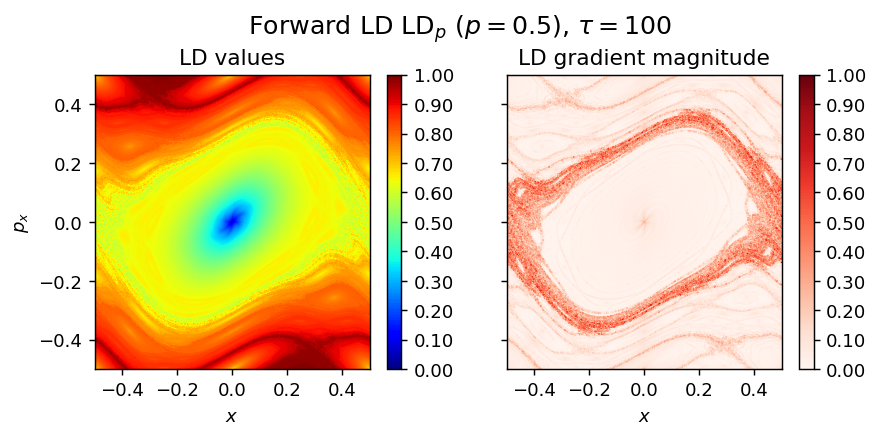

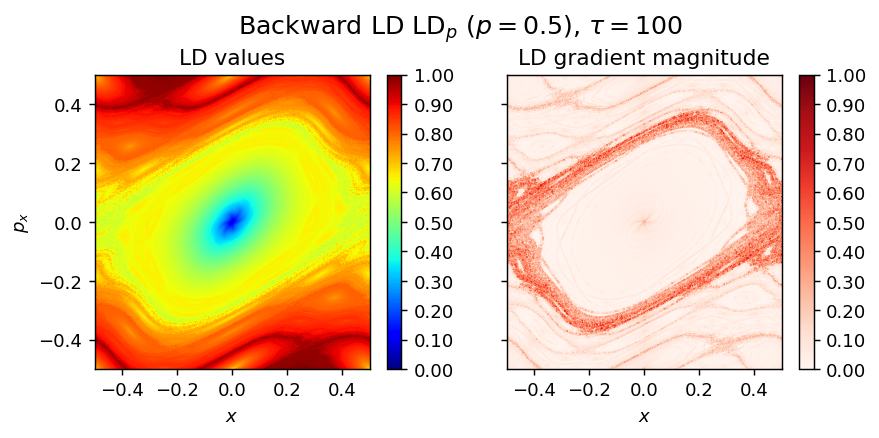

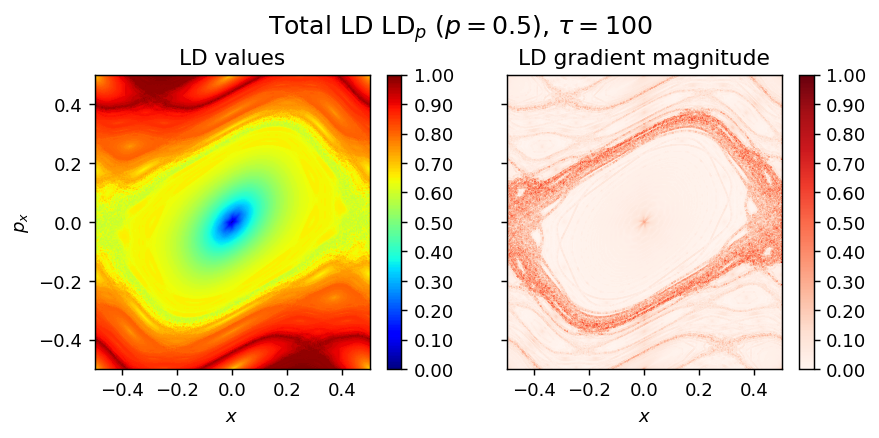

In [6]:
f = discrete_map
LD_forward = compute_lagrangian_descriptor(grid_parameters, f, N_iterations, p_value, box_boundaries)
draw_lagrangian_descriptor(LD_forward,'forward', grid_parameters, N_iterations, p_value, colormap_name='jet')

f_inverse = discrete_map_inverse
LD_backward = compute_lagrangian_descriptor(grid_parameters, f_inverse, N_iterations, p_value, box_boundaries)
draw_lagrangian_descriptor(LD_backward,'backward', grid_parameters, N_iterations, p_value, colormap_name='jet')

LD_total = LD_forward + LD_backward
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, N_iterations, p_value, colormap_name='jet')

### Hénon map

In [7]:
from pylds.discrete_maps import HenonMap, HenonMap_inverse

In [8]:
p_value = 0.5

N_iterations = 12

x_min, x_max, Nx = [-1.5, 1.5, 600]
y_min, y_max, Ny = [-1.5, 1.5, 600]

a, b = [0.298, 1] # standard map parameter

box_boundaries = [(-5, 5),(-5, 5)]

In [9]:
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

In [10]:
discrete_map = discrete_map = lambda u: HenonMap(u,PARAMETERS=[a, b])
discrete_map_inverse = lambda u: HenonMap_inverse(u,PARAMETERS=[a, b])

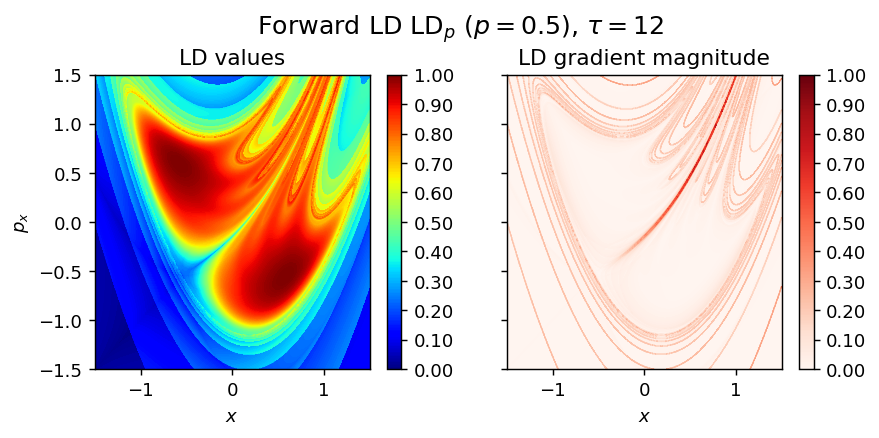

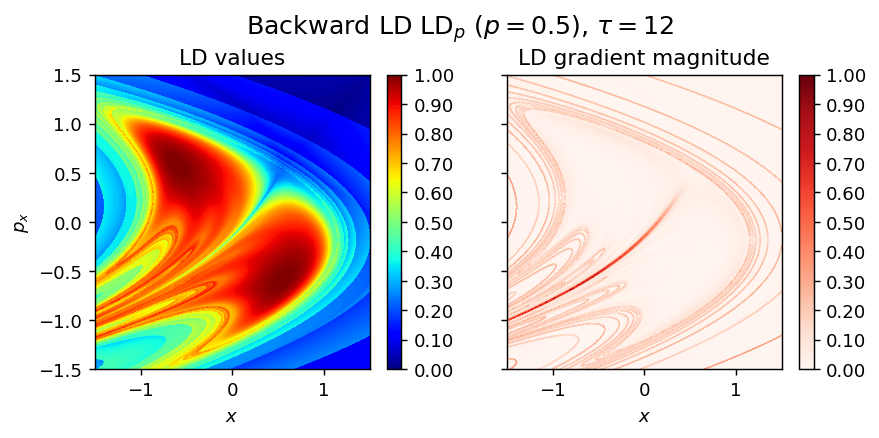

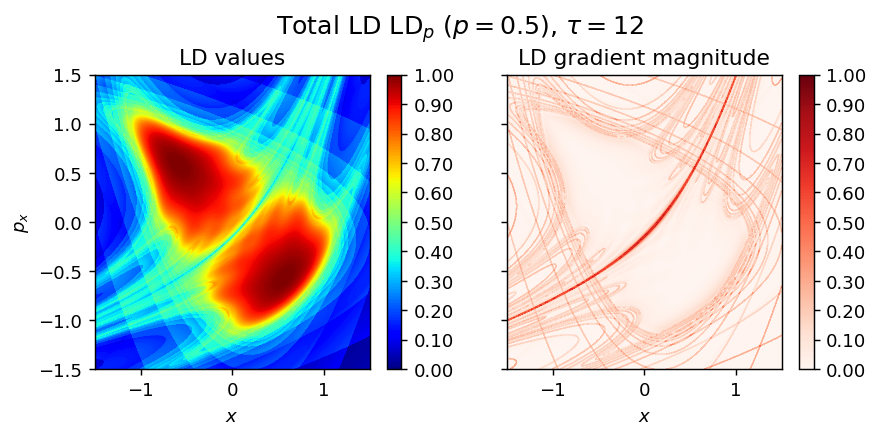

In [11]:
f = discrete_map
LD_forward = compute_lagrangian_descriptor(grid_parameters, f, N_iterations, p_value, box_boundaries)
draw_lagrangian_descriptor(LD_forward,'forward', grid_parameters, N_iterations, p_value, colormap_name='jet')

f_inverse = discrete_map_inverse
LD_backward = compute_lagrangian_descriptor(grid_parameters, f_inverse, N_iterations, p_value, box_boundaries)
draw_lagrangian_descriptor(LD_backward,'backward', grid_parameters, N_iterations, p_value, colormap_name='jet')

LD_total = LD_forward + LD_backward
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, N_iterations, p_value, colormap_name='jet')

# Appendix

## Fast recursion using decorators

SOURCE

* https://realpython.com/python-thinking-recursively/#recursive-functions-in-python

In [249]:
def fibonacci_recursive(n):
#     print("Calculating F", "(", n, ")", sep="", end=", ")
    # Base case
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

In [252]:
fibonacci_recursive(40)

KeyboardInterrupt: 

In [253]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fibonacci_recursive(n):
#     print("Calculating F", "(", n, ")", sep="", end=", ")

    # Base case
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

In [254]:
fibonacci_recursive(40)

102334155